In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import mat73

In [3]:
mat_data = mat73.loadmat('indy_20161005_06.mat')

In [7]:
spikes_times = []

time = -1
for i in range(96):
    spike_time = mat_data['spikes'][i][0]
    if spike_time is not None:
        temp = np.argmax(spike_time)
        time = max(time, temp)
    spikes_times.append(spike_time)

False


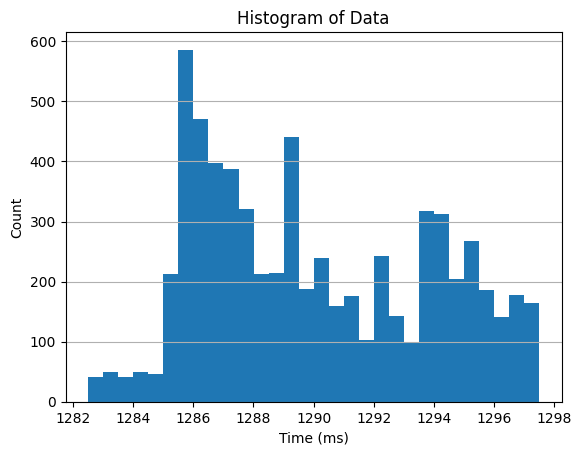

In [18]:
fig, ax = plt.subplots()

print(np.isscalar(spikes_times[44]))

flat_data = []
for sublist in spikes_times:
    if sublist is not None:
        if sublist.size == 1:
            flat_data.append(sublist.item())
        else:
            for item in sublist:
                flat_data.append(item)

bin_edges = np.arange(min(flat_data) - 0.25, max(flat_data) + 0.25, 0.5)
hist, _ = np.histogram(flat_data, bins=bin_edges)

# 绘制直方图
plt.bar(bin_edges[0:30], hist[0:30], width=0.5, align='center')

# 设置图形属性
plt.xlabel('Time (ms)')
plt.ylabel('Count')
plt.title('Peri-Stimulus Time Histogram (PSTH)')
plt.grid(axis='y')


plt.show()

In [ ]:
# 提取数据
spikes = mat_data['spikes']
num_neurons = len(spikes)
trial_duration = mat_data['t'][-1]
num_trials = len(spikes[0][0])